<a href="https://colab.research.google.com/github/Cloud-king23/Cloud-king23.github.io/blob/main/Copy_of_week_2_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


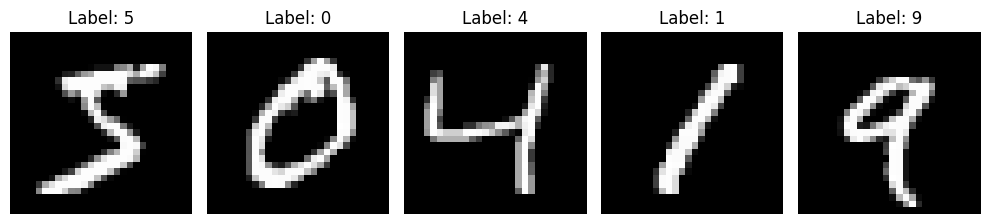

Building and training model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6432 - loss: 1.1907 - val_accuracy: 0.8720 - val_loss: 0.4358
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9097 - loss: 0.3299 - val_accuracy: 0.8980 - val_loss: 0.3492
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9268 - loss: 0.2529 - val_accuracy: 0.9060 - val_loss: 0.3019
313/313 - 1s - 2ms/step - accuracy: 0.9210 - loss: 0.2725

Test accuracy: 0.9210
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

Sample predictions (probability distributions):
[[1.3341045e-05 1.6478068e-06 1.5405151e-04 1.7876569e-03 3.1804441e-06
  8.4367020e-06 3.0423976e-07 9.9759150e-01 7.7745754e-06 4.3217116e-04]
 [1.3912353e-03 8.7010761e-04 9.6768939e-01 6.2335287e-03 1.5732949e-06
  3.6952693e-03 1.6784621e-02 6.2166291e-06 3.3245834e-03 3.4469472e-06]
 [1.9151815e-04 9.8142713e-01 4.0923632e-03 1.5869141e-03 1.1297723e-03
  8.5867400e-04 2.7253793e-03 3.9324001e-03 3.4265365e-03 6.2936737e-04]
 [9.9546993e-01 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
print("Loading MNIST dataset...")
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display some sample images to verify data loading
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
# Build a simple model
print("Building and training model...")
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (with a small subset for quick testing)
history = model.fit(x_train[:5000], y_train[:5000], epochs=3,
                    validation_data=(x_test[:1000], y_test[:1000]))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Make some predictions
predictions = model.predict(x_test[:5])
print("\nSample predictions (probability distributions):")
print(predictions)

print("\nPredicted classes:")
print(np.argmax(predictions, axis=1))

print("\nActual classes:")
print(y_test[:5])
print("\nTensorFlow is working correctly with the MNIST dataset!")
